This section will cover the EDA portion of this project. In this section we will aim to explore the data and see if there are any interesting correlations or findings. 

In [1]:
# Importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('data_cleaned.csv')
df.head()

,Unnamed: 0,id,name,currency,launched_at,backers_count,country,status,usd_pledged,sub_category,main_category,blurb_length,goal_usd,city,duration,month,launched_year,success_yn
0,0,1714728788,Urban Farm Kits: Our Solution to City Farming,CAD,2018-02-10 22:47:52,16,CA,failed,577.9,food,Farms,122,785.8,Victoria,60.0,2,2018,0
1,1,1639965256,Reflections on the LHC Safety Report,USD,2014-11-21 10:42:26,7,US,successful,211.0,publishing,Academic,35,93.0,San Diego,24.0,11,2014,1
2,2,1582062943,Ultra-Custom Chocolate Bars,USD,2020-10-19 05:26:59,99,US,successful,4697.0,food,Small Batch,122,1500.0,Philadelphia,30.0,10,2020,1
3,3,1888984372,GlassWeb: Internet Monitoring,USD,2019-05-29 16:01:34,3,US,failed,222.0,technology,Gadgets,69,25000.0,Chicago,60.0,5,2019,0
4,4,1409770586,Dreaming of Streaming - 96.9 FM KMRD-LP Madrid...,USD,2015-11-19 20:36:01,100,US,successful,5410.0,publishing,Radio & Podcasts,131,5000.0,Madrid,30.0,11,2015,1


In [3]:
df.columns

Index(['Unnamed: 0', 'id', 'name', 'currency', 'launched_at', 'backers_count',
       'country', 'status', 'usd_pledged', 'sub_category', 'main_category',
       'blurb_length', 'goal_usd', 'city', 'duration', 'month',
       'launched_year', 'success_yn'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x7ff2e80862e0>,
 [Text(-0.1544954531329377, 1.089096485606876, 'failed'),
  Text(-0.0637624844200119, -1.0981504202888546, 'successful'),
  Text(1.066717502217942, -0.26854007235776756, 'live'),
  Text(1.0987485689837642, -0.05245552550619184, 'canceled')],
 [Text(-0.08427024716342056, 0.5940526285128415, '54.5%'),
  Text(-0.03477953695637012, -0.5989911383393751, '39.2%'),
  Text(0.5818459103006955, -0.14647640310423682, '4.8%'),
  Text(0.5993174012638713, -0.02861210482155918, '1.5%')])

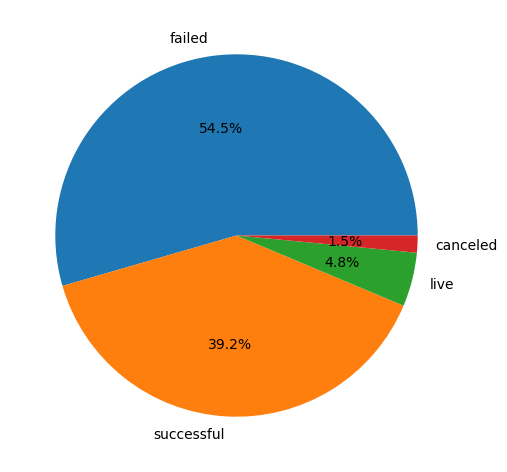

In [4]:
# Let's create a pie chart showing the percentage of campaigns that were successes. 

size=df['status'].value_counts()

sizes=size.values

label=df['status'].unique()

plt.figure(figsize=(9,6),dpi=100)

plt.pie(sizes,labels=label,autopct='%1.1f%%')



In [5]:
# Here we have some results for status that are canceled or live. Let's remove them now

df=df[df['status']!='canceled']
df=df[df['status']!='live']

([<matplotlib.patches.Wedge at 0x7ff308181c70>,
 [Text(-0.27919623779075325, 1.0639781298520612, 'failed'),
  Text(0.27919633740757394, -1.0639781037118181, 'successful')],
 [Text(-0.15228885697677447, 0.5803517071920333, '58.2%'),
  Text(0.15228891131322211, -0.5803516929337189, '41.8%')])

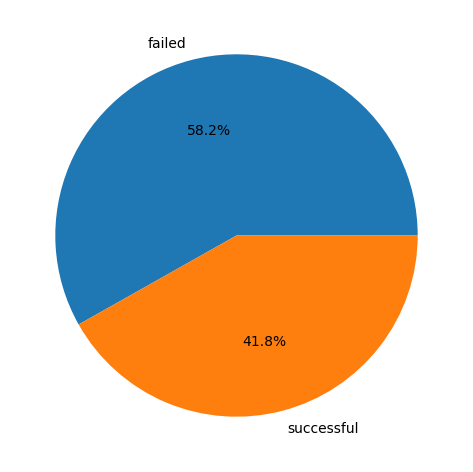

In [6]:
size=df['status'].value_counts()

sizes=size.values

label=df['status'].unique()

plt.figure(figsize=(9,6),dpi=100)

plt.pie(sizes,labels=label,autopct='%1.1f%%')


In [7]:
# About 60% of the campaigns failed and 40% of the campaigns were successful.

In [8]:
# Now let's look at some distributions using barplots. 
df.columns

Index(['Unnamed: 0', 'id', 'name', 'currency', 'launched_at', 'backers_count',
       'country', 'status', 'usd_pledged', 'sub_category', 'main_category',
       'blurb_length', 'goal_usd', 'city', 'duration', 'month',
       'launched_year', 'success_yn'],
      dtype='object')

In [9]:
df['main_category'].nunique()

159

<AxesSubplot:>

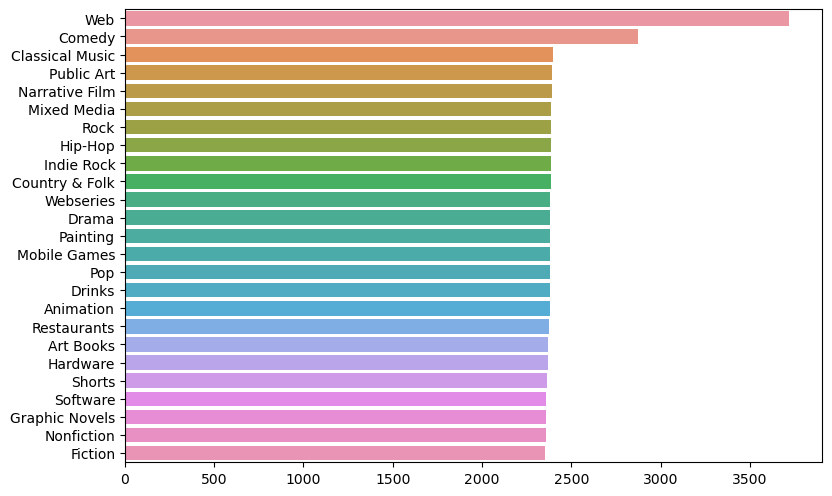

In [10]:
# Because there are so many different categories for the promotions, let's just look at the top 25. 

df_maincat_num=df['main_category'].value_counts()[:25]
plt.figure(figsize=(9,6),dpi=100)
sns.barplot(data=df,x=df_maincat_num.values,y=df_maincat_num.index)

Web seems to have the most campaigns in this dataset followed by comedy. 

In [11]:
# Now let's do the same for sub category

df['sub_category'].nunique()

15

<AxesSubplot:>

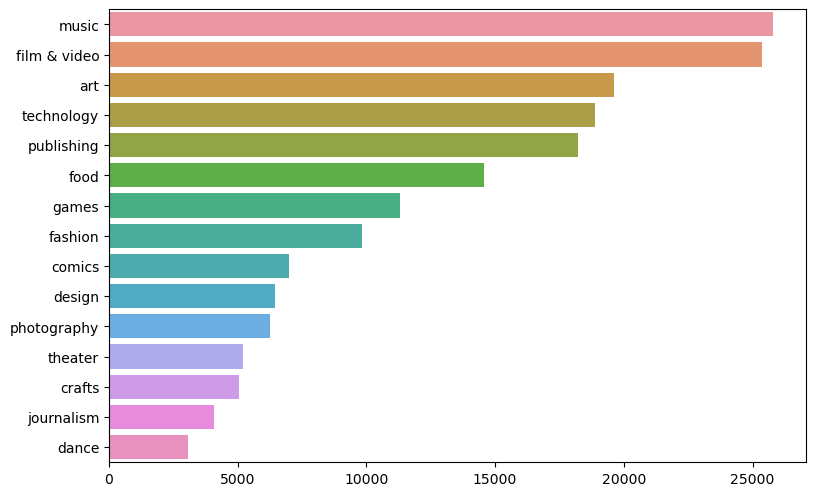

In [12]:
df_sub_num=df['sub_category'].value_counts()
plt.figure(figsize=(9,6),dpi=100)
sns.barplot(data=df,x=df_sub_num.values,y=df_sub_num.index)

There seems to be the most campaigns in music followed by film & video. 

- Looking at this information, the sub category seems to be the main category and the main category seems to be the sub category. 
- Let's rename these columns now. 

In [13]:
df.rename(columns={'main_category': 'sub_category', 'sub_category': 'main_category'},inplace=True)
df['main_category'].nunique()

15

In [14]:
df.columns

Index(['Unnamed: 0', 'id', 'name', 'currency', 'launched_at', 'backers_count',
       'country', 'status', 'usd_pledged', 'main_category', 'sub_category',
       'blurb_length', 'goal_usd', 'city', 'duration', 'month',
       'launched_year', 'success_yn'],
      dtype='object')

In [15]:
df['country'].nunique()

25

<AxesSubplot:>

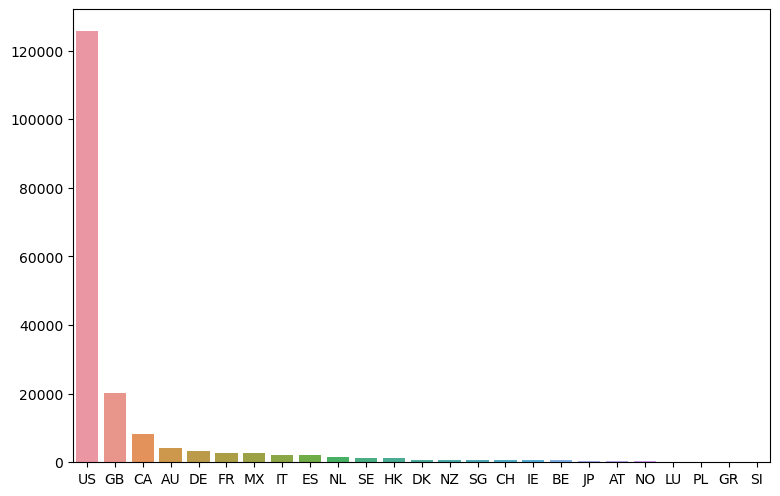

In [16]:
df_country_num=df['country'].value_counts()
plt.figure(figsize=(9,6),dpi=100)
sns.barplot(data=df,x=df_country_num.index,y=df_country_num.values)


It is clear that the majority of this dataset comes from campaigns in the U.S. We probably have to take a closer look at the campaigns happening in the U.S and those that are happening outside the U.S

In [17]:
df.columns

Index(['Unnamed: 0', 'id', 'name', 'currency', 'launched_at', 'backers_count',
       'country', 'status', 'usd_pledged', 'main_category', 'sub_category',
       'blurb_length', 'goal_usd', 'city', 'duration', 'month',
       'launched_year', 'success_yn'],
      dtype='object')

<AxesSubplot:xlabel='count', ylabel='main_category'>

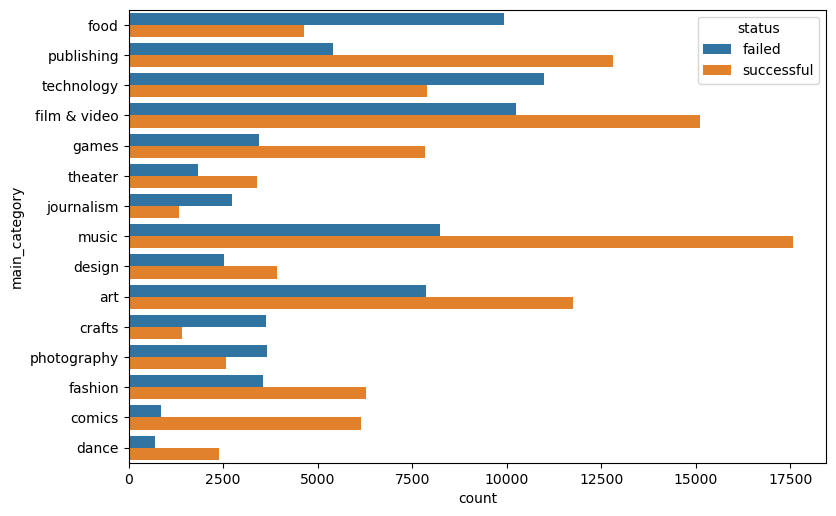

In [19]:
# Let's make some barplots with status as an indicator.

plt.figure(figsize=(9,6),dpi=100)

sns.countplot(data=df,y='main_category',hue='status')


Music,art,publishing, and film&video have a high success rate.

In [22]:
# Year and success rate

df['launched_year'].value_counts()

2015    30481
2016    23548
2017    22089
2014    21271
2020    21219
2019    20796
2018    20017
2013     9683
2012     6394
2011     3641
2010     1322
2009      214
Name: launched_year, dtype: int64

It seems that 2015 and 2016 had the most campaigns.

In [27]:
# #Comparing year to success rate

year_success_rate=df.groupby('launched_year')['success_yn'].mean().to_frame().reset_index().sort_values('success_yn',ascending=False)
year_success_rate.head()

,launched_year,success_yn
0,2009,0.822430
4,2013,0.810493
2,2011,0.795661
3,2012,0.789803
1,2010,0.768533


2009,2013,2011 had the highest success rate. 

In [29]:
# Comparing category to success rate

category_success_rate=df.groupby('main_category')['success_yn'].mean().to_frame().reset_index().sort_values('success_yn',ascending=False)
category_success_rate

,main_category,success_yn
1,comics,0.879394
3,dance,0.777489
12,publishing,0.703062
8,games,0.693861
10,music,0.681018
14,theater,0.648897
5,fashion,0.639129
4,design,0.609160
0,art,0.599459
6,film & video,0.595969


Comics,dance,publishing,games, then music have the highest success rates. 

In [30]:
# Let's now create a new dataframe which takes in only the successful campaigns

df_success=df[df['status']=='successful']
df_success.head()

,Unnamed: 0,id,name,currency,launched_at,backers_count,country,status,usd_pledged,main_category,sub_category,blurb_length,goal_usd,city,duration,month,launched_year,success_yn
1,1,1639965256,Reflections on the LHC Safety Report,USD,2014-11-21 10:42:26,7,US,successful,211.0,publishing,Academic,35,93.0,San Diego,24.0,11,2014,1
2,2,1582062943,Ultra-Custom Chocolate Bars,USD,2020-10-19 05:26:59,99,US,successful,4697.0,food,Small Batch,122,1500.0,Philadelphia,30.0,10,2020,1
4,4,1409770586,Dreaming of Streaming - 96.9 FM KMRD-LP Madrid...,USD,2015-11-19 20:36:01,100,US,successful,5410.0,publishing,Radio & Podcasts,131,5000.0,Madrid,30.0,11,2015,1
5,5,1184883770,The Breaks Season 1.5 (Episodes 4-9),USD,2014-03-14 20:56:54,106,US,successful,5782.0,film & video,Webseries,134,4000.0,Los Angeles,31.0,3,2014,1
6,6,673847406,Ninty Fresh Issue 2,GBP,2020-09-21 08:01:19,1156,GB,successful,19829.4,publishing,Zines,93,3366.7,Essex,45.0,9,2020,1


In [31]:
df_success['main_category'].value_counts()

music           17573
film & video    15109
publishing      12814
art             11756
technology       7902
games            7833
fashion          6282
comics           6154
food             4633
design           3937
theater          3384
photography      2576
dance            2390
crafts           1417
journalism       1336
Name: main_category, dtype: int64

In [32]:
df_success['duration'].value_counts()

30.0    43321
60.0     5166
31.0     4600
45.0     3472
21.0     3297
        ...  
78.0        4
73.0        3
79.0        3
83.0        2
98.0        1
Name: duration, Length: 92, dtype: int64

In [33]:
df_success['sub_category'].value_counts()

Rock              2385
Country & Folk    2384
Indie Rock        2384
Shorts            2362
Nonfiction        2356
                  ... 
Bacon               40
Photo               39
Chiptune            38
Quilts              21
Taxidermy            5
Name: sub_category, Length: 159, dtype: int64

In [35]:
success_category_amount=df_success.groupby('main_category')['usd_pledged'].sum().to_frame().reset_index().sort_values('usd_pledged',ascending=False)
success_category_amount

,main_category,usd_pledged
13,technology,763749330.0
8,games,395881399.7
6,film & video,257511683.2
4,design,243945608.4
12,publishing,135046929.1
10,music,134941952.4
5,fashion,113263532.0
7,food,96363759.9
0,art,83996080.9
1,comics,79078041.5


While music had the highest amount of successful campaigns and comics had the highest success rate, technology has the highest money raised by a large amount. This makes sense as technology campaigns are usually bigger and when they succeed they raise a lot of money. 

In [44]:
# Let's create a dataframe which includes the categories as well as a measure of how much more the money raised was 
# than the goal.

df_success_grouped=df_success.groupby('main_category')['goal_usd','usd_pledged'].sum().reset_index()
df_success_grouped['how many times over goal']=df['usd_pledged']/df['goal_usd']
df_success_grouped.sort_values('how many times over goal',ascending=False,inplace=True)
df_success_grouped[['main_category','how many times over goal']]

<ipython-input-44-9c294cf66702>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_success_grouped=df_success.groupby('main_category')['goal_usd','usd_pledged'].sum().reset_index()


,main_category,how many times over goal
6,film & video,5.889862
11,photography,4.604583
14,theater,3.283916
2,crafts,3.131333
1,comics,2.268817
9,journalism,1.867240
7,food,1.772667
5,fashion,1.445500
12,publishing,1.136008
10,music,1.109350


Film & video and photography have exceeded their goal by about 6 times. _

In [47]:
# Because this dataset features mostly data from campaigns in the U.S, let's take a look at data for countries that
# are not the U.S

df_non_US=df[df['country']!='US']
df_non_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54941 entries, 0 to 192886
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     54941 non-null  int64  
 1   id             54941 non-null  int64  
 2   name           54941 non-null  object 
 3   currency       54941 non-null  object 
 4   launched_at    54941 non-null  object 
 5   backers_count  54941 non-null  int64  
 6   country        54941 non-null  object 
 7   status         54941 non-null  object 
 8   usd_pledged    54941 non-null  float64
 9   main_category  54941 non-null  object 
 10  sub_category   54941 non-null  object 
 11  blurb_length   54941 non-null  int64  
 12  goal_usd       54941 non-null  float64
 13  city           54941 non-null  object 
 14  duration       54941 non-null  float64
 15  month          54941 non-null  int64  
 16  launched_year  54941 non-null  int64  
 17  success_yn     54941 non-null  int64  
dtypes: fl

Text(0.5, 1.0, 'Number of campaigns across categories not in the US')

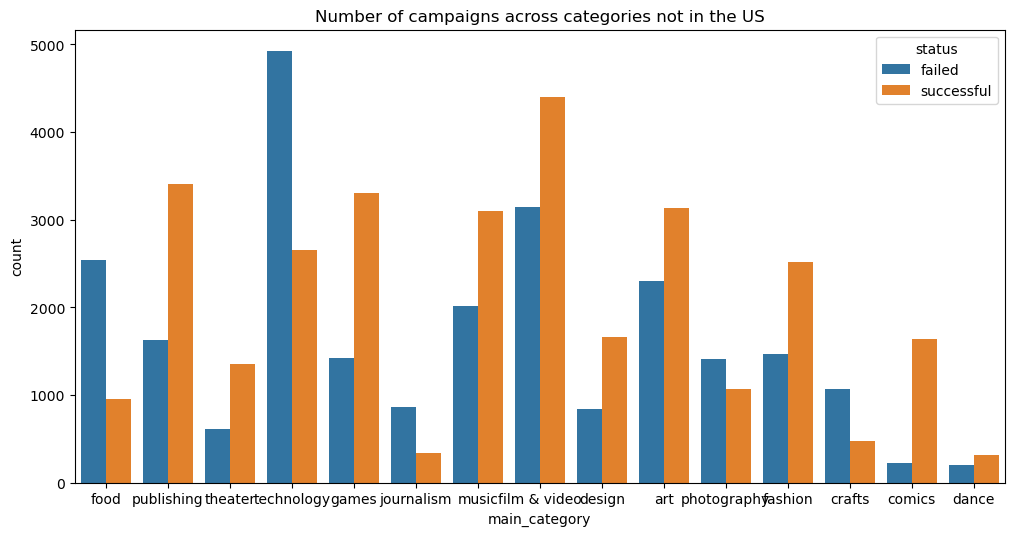

In [56]:
# Looking at success counts for each category 
plt.figure(figsize=(12,6),dpi=100)
sns.countplot(data=df_non_US,x='main_category',hue='status')
plt.title('Number of campaigns across categories not in the US')

In [57]:
# For non-US data, let's make a line graph that consists of both the amount raised and their goal to visualize 
# the comparison.

df_non_us_success=df_non_US[df_non_US['status']=='successful']

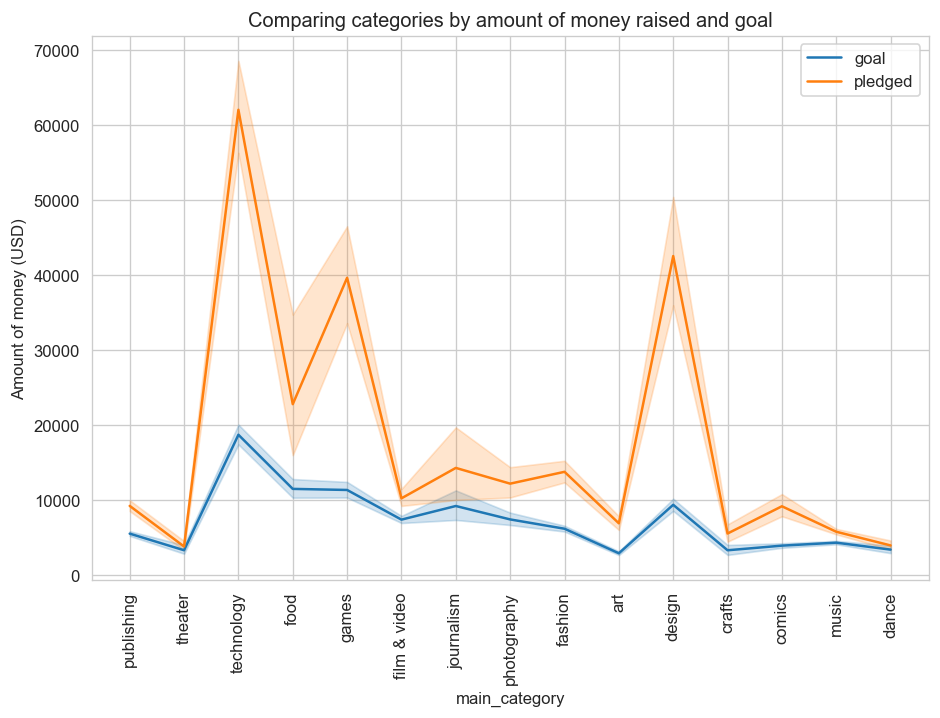

In [65]:
sns.set_style('whitegrid')
plt.figure(figsize=(9,6),dpi=120)
sns.lineplot(data=df_non_us_success,x='main_category',y='goal_usd')
sns.lineplot(data=df_non_us_success,x='main_category',y='usd_pledged')
plt.xticks(rotation=90)
plt.ylabel('Amount of money (USD)')
plt.title('Comparing categories by amount of money raised and goal',fontsize=12)
plt.legend(['goal','pledged'],loc='upper right')
plt.show()

In [68]:
# Success rate vs duration

project_duration=df_non_US.groupby('duration')['success_yn'].mean().to_frame().reset_index()
project_duration.head()


,duration,success_yn
0,1.0,0.500000
1,2.0,0.653846
2,3.0,0.609756
3,4.0,0.534884
4,5.0,0.600000


<Figure size 720x480 with 0 Axes>

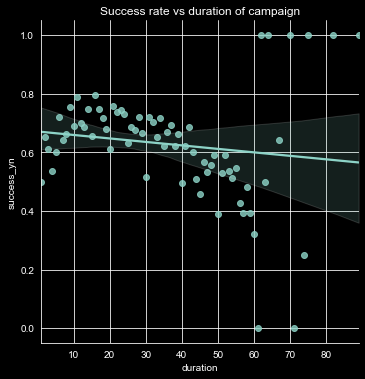

In [69]:
plt.figure(dpi=120)
plt.style.use('dark_background')
sns.lmplot(data=project_duration, x='duration',y='success_yn')
plt.title('Success rate vs duration of campaign',fontsize=12)
plt.show()

In this graph, we can see that the success rate goes down as the duration of the campaign gets longer. 
However, this might be slightly biased because a lot of the campaigns that have a short duration are asking for a small amount of money which makes success relatively easier.

Therefore, let's look at this same graph again goals(USD) exceeding 1000 dollars. Let's also do this for the whole dataset instead of only campaigns not in the U.S

In [82]:
df.head()

,Unnamed: 0,id,name,currency,launched_at,backers_count,country,status,usd_pledged,main_category,sub_category,blurb_length,goal_usd,city,duration,month,launched_year,success_yn
0,0,1714728788,Urban Farm Kits: Our Solution to City Farming,CAD,2018-02-10 22:47:52,16,CA,failed,577.9,food,Farms,122,785.8,Victoria,60.0,2,2018,0
1,1,1639965256,Reflections on the LHC Safety Report,USD,2014-11-21 10:42:26,7,US,successful,211.0,publishing,Academic,35,93.0,San Diego,24.0,11,2014,1
2,2,1582062943,Ultra-Custom Chocolate Bars,USD,2020-10-19 05:26:59,99,US,successful,4697.0,food,Small Batch,122,1500.0,Philadelphia,30.0,10,2020,1
3,3,1888984372,GlassWeb: Internet Monitoring,USD,2019-05-29 16:01:34,3,US,failed,222.0,technology,Gadgets,69,25000.0,Chicago,60.0,5,2019,0
4,4,1409770586,Dreaming of Streaming - 96.9 FM KMRD-LP Madrid...,USD,2015-11-19 20:36:01,100,US,successful,5410.0,publishing,Radio & Podcasts,131,5000.0,Madrid,30.0,11,2015,1


Text(0.5, 1.0, 'Duration vs success rate for campaigns with goals over 1000 USD')

<Figure size 720x480 with 0 Axes>

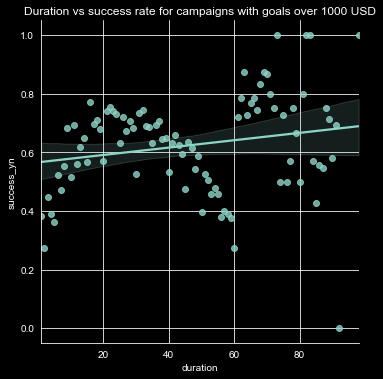

In [86]:
# Duration vs success rate for goals exceeding 1000 USD

df_goals_over_1000=df[df['goal_usd']>1000]
df_goals_over_1000_grouped=df_goals_over_1000.groupby('duration')['success_yn'].mean().to_frame().reset_index()
plt.figure(dpi=120)
plt.style.use('dark_background')
sns.lmplot(data=df_goals_over_1000_grouped,x='duration',y='success_yn')
plt.title('Duration vs success rate for campaigns with goals over 1000 USD')

Here we can see that for campaigns where goal exceeds 1000 USD, there is a positive correlation between duration and success rate. 

In [87]:
df.head()

,Unnamed: 0,id,name,currency,launched_at,backers_count,country,status,usd_pledged,main_category,sub_category,blurb_length,goal_usd,city,duration,month,launched_year,success_yn
0,0,1714728788,Urban Farm Kits: Our Solution to City Farming,CAD,2018-02-10 22:47:52,16,CA,failed,577.9,food,Farms,122,785.8,Victoria,60.0,2,2018,0
1,1,1639965256,Reflections on the LHC Safety Report,USD,2014-11-21 10:42:26,7,US,successful,211.0,publishing,Academic,35,93.0,San Diego,24.0,11,2014,1
2,2,1582062943,Ultra-Custom Chocolate Bars,USD,2020-10-19 05:26:59,99,US,successful,4697.0,food,Small Batch,122,1500.0,Philadelphia,30.0,10,2020,1
3,3,1888984372,GlassWeb: Internet Monitoring,USD,2019-05-29 16:01:34,3,US,failed,222.0,technology,Gadgets,69,25000.0,Chicago,60.0,5,2019,0
4,4,1409770586,Dreaming of Streaming - 96.9 FM KMRD-LP Madrid...,USD,2015-11-19 20:36:01,100,US,successful,5410.0,publishing,Radio & Podcasts,131,5000.0,Madrid,30.0,11,2015,1


<AxesSubplot:xlabel='month', ylabel='count'>

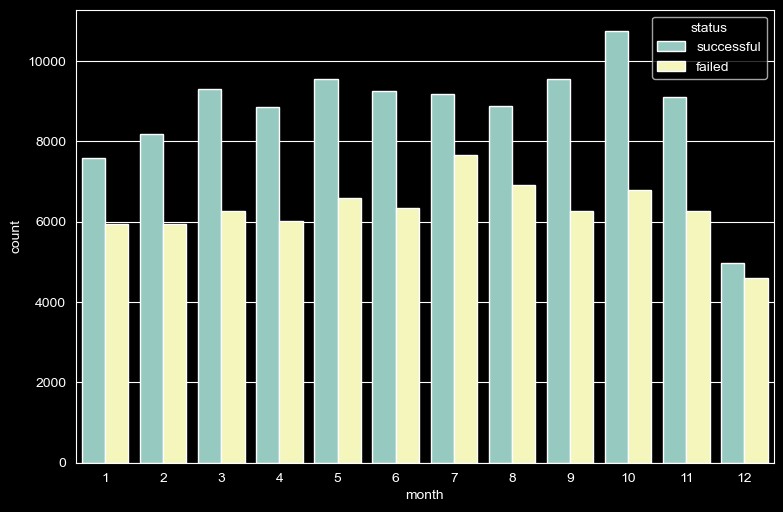

In [116]:
# Month vs amount of success and failures

plt.figure(figsize=(9,6),dpi=100)
df_month=df.groupby(['month','status'])['month'].count().reset_index(name='count')
sns.barplot(data=df_month_sorted,x='month',y='count',hue='status')

From this graph, we can see that October and May have the highest success count. Let's confirm this by making a quick value counts plot for success count and also a graph for success pct.

In [118]:
df_month=df_month[df_month['status']=='successful']
df_month.sort_values('count',ascending=False)

,month,status,count
19,10,successful,10737
9,5,successful,9558
17,9,successful,9549
5,3,successful,9297
11,6,successful,9246
13,7,successful,9175
21,11,successful,9091
15,8,successful,8866
7,4,successful,8861
3,2,successful,8174


<AxesSubplot:xlabel='month', ylabel='success_yn'>

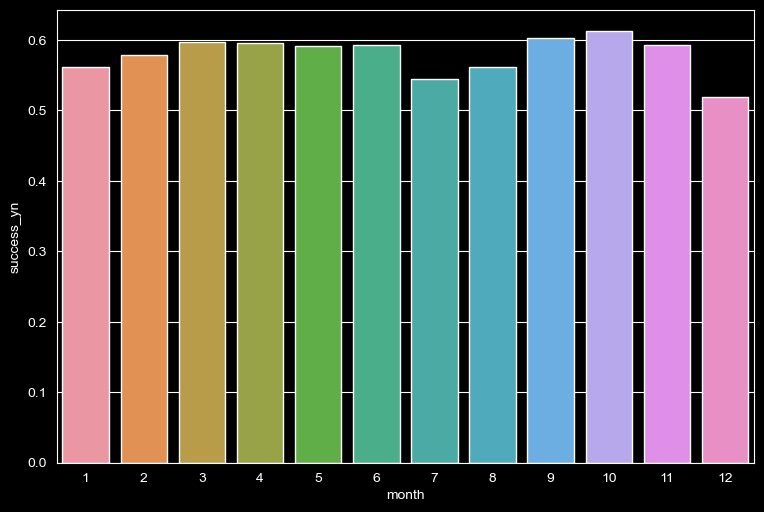

In [123]:
# Month vs success percentage

month_grouped_success=df.groupby('month')['success_yn'].mean().to_frame().reset_index()
month_grouped_success.head()
plt.figure(figsize=(9,6),dpi=100)
sns.barplot(data=month_grouped_success,x='month',y='success_yn')

Month doesn't have that much of an effect on success percentage. 

In [124]:
df.head()

,Unnamed: 0,id,name,currency,launched_at,backers_count,country,status,usd_pledged,main_category,sub_category,blurb_length,goal_usd,city,duration,month,launched_year,success_yn
0,0,1714728788,Urban Farm Kits: Our Solution to City Farming,CAD,2018-02-10 22:47:52,16,CA,failed,577.9,food,Farms,122,785.8,Victoria,60.0,2,2018,0
1,1,1639965256,Reflections on the LHC Safety Report,USD,2014-11-21 10:42:26,7,US,successful,211.0,publishing,Academic,35,93.0,San Diego,24.0,11,2014,1
2,2,1582062943,Ultra-Custom Chocolate Bars,USD,2020-10-19 05:26:59,99,US,successful,4697.0,food,Small Batch,122,1500.0,Philadelphia,30.0,10,2020,1
3,3,1888984372,GlassWeb: Internet Monitoring,USD,2019-05-29 16:01:34,3,US,failed,222.0,technology,Gadgets,69,25000.0,Chicago,60.0,5,2019,0
4,4,1409770586,Dreaming of Streaming - 96.9 FM KMRD-LP Madrid...,USD,2015-11-19 20:36:01,100,US,successful,5410.0,publishing,Radio & Podcasts,131,5000.0,Madrid,30.0,11,2015,1


<ipython-input-130-603b1d77631b>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_goal_and_success=df.groupby('main_category')['goal_usd','success_yn'].mean()


<Figure size 900x600 with 0 Axes>

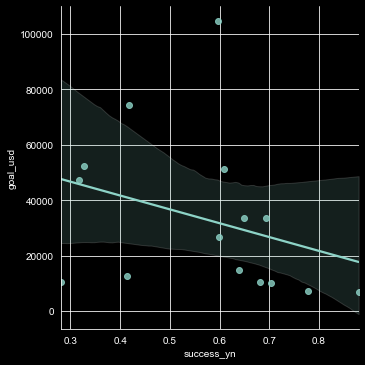

In [130]:
# Compare goal_usd and success percentage by creating a lmplot showing their correlation

df_goal_and_success=df.groupby('main_category')['goal_usd','success_yn'].mean()
df_goal_and_success.head()
plt.figure(figsize=(9,6),dpi=100)
sns.lmplot(data=df_goal_and_success,x='success_yn',y='goal_usd')


Here we can see a clear correlation between the success rate and the goal(USD) where the success rate becomes much lower when the goal is higher.

In [131]:
df.head()

,Unnamed: 0,id,name,currency,launched_at,backers_count,country,status,usd_pledged,main_category,sub_category,blurb_length,goal_usd,city,duration,month,launched_year,success_yn
0,0,1714728788,Urban Farm Kits: Our Solution to City Farming,CAD,2018-02-10 22:47:52,16,CA,failed,577.9,food,Farms,122,785.8,Victoria,60.0,2,2018,0
1,1,1639965256,Reflections on the LHC Safety Report,USD,2014-11-21 10:42:26,7,US,successful,211.0,publishing,Academic,35,93.0,San Diego,24.0,11,2014,1
2,2,1582062943,Ultra-Custom Chocolate Bars,USD,2020-10-19 05:26:59,99,US,successful,4697.0,food,Small Batch,122,1500.0,Philadelphia,30.0,10,2020,1
3,3,1888984372,GlassWeb: Internet Monitoring,USD,2019-05-29 16:01:34,3,US,failed,222.0,technology,Gadgets,69,25000.0,Chicago,60.0,5,2019,0
4,4,1409770586,Dreaming of Streaming - 96.9 FM KMRD-LP Madrid...,USD,2015-11-19 20:36:01,100,US,successful,5410.0,publishing,Radio & Podcasts,131,5000.0,Madrid,30.0,11,2015,1


In [133]:
df.to_csv('EDA_data')